# SALARY ANALYSIS

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Create a list of SEA countries
SEA_countries = ['Vietnam', 'Thailand','Malaysia','Philippines','Indonesia','Laos','Cambodia','Myanmar','Singapore','Brunei', 'West Timor']

c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## What are the most well-paid data jobs and what are the most well-paid data skills for Data Analyst in SEA countries?

### 1. Well-paid jobs

In [3]:
df_SEA = df[df['job_country'].isin(SEA_countries)].dropna(subset='salary_year_avg').copy()
df_SEA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3016,Data Scientist,CI/XAB - Big data Hadoop developer,Vietnam,via Ai-Jobs.net,Full-time,False,Vietnam,2023-01-06 13:45:37,False,False,Vietnam,year,50400.0,NaN,Bosch Group,"[java, hadoop, spark, unix, sap, yarn]","{'analyst_tools': ['sap'], 'libraries': ['hado..."
3457,Data Analyst,Session Lead (External Contractor) - Data Anal...,Singapore,via Ai-Jobs.net,Part-time,False,Singapore,2023-08-08 13:28:55,True,False,Singapore,year,100500.0,NaN,"Udacity, Inc.","[python, sql, numpy, pandas, zoom, slack]","{'libraries': ['numpy', 'pandas'], 'programmin..."
6431,Data Engineer,Data Engineer,"Bangkok, Thailand",via Ai-Jobs.net,Full-time,False,Thailand,2023-01-05 13:36:12,True,False,Thailand,year,96760.5,NaN,Data Wow,"[python, sql, aws, flask, django, fastapi, win...","{'cloud': ['aws'], 'os': ['windows'], 'other':..."
7931,Data Analyst,Investments Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-02-07 13:19:23,False,False,Malaysia,year,51014.0,NaN,500 Global,"[python, r, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
8643,Senior Data Engineer,"Senior Engineer, Data Analytics",Malaysia,via Ai-Jobs.net,Full-time,False,Malaysia,2023-02-10 14:22:12,False,False,Malaysia,year,79200.0,NaN,Western Digital,"[python, c#, sql, assembly]","{'programming': ['python', 'c#', 'sql', 'assem..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778805,Data Analyst,Carbon Data Analyst,Singapore,via Ai-Jobs.net,Full-time,False,Singapore,2023-05-16 06:24:32,True,False,Singapore,year,98500.0,NaN,Terrascope,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
778911,Business Analyst,"Lead BI Analyst (Supply Analytics, Bangkok-based)","Bangkok, Thailand",via Ai-Jobs.net,Full-time,False,Thailand,2023-06-10 05:19:29,False,False,Thailand,year,63000.0,NaN,Agoda,"[sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
780456,Senior Data Analyst,Opex Senior Data Analyst,"Ho Chi Minh City, Vietnam",via Ai-Jobs.net,Full-time,False,Vietnam,2023-04-18 05:10:51,True,False,Vietnam,year,111175.0,NaN,Ninja Van,[python],{'programming': ['python']}
782500,Senior Data Analyst,"Senior Data Analyst (Flights team, Bangkok-bas...","Bangkok, Thailand",via Ai-Jobs.net,Full-time,False,Thailand,2023-06-10 06:19:34,False,False,Thailand,year,111175.0,NaN,Agoda,"[sql, python, r, tableau, excel]","{'analyst_tools': ['tableau', 'excel'], 'progr..."


In [4]:
# get the job roles that was highly sought-after
job_titles = df_SEA['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Engineer',
 'Machine Learning Engineer',
 'Senior Data Analyst']

In [5]:
df_SEA_top6 = df_SEA[df_SEA['job_title_short'].isin(job_titles)].copy()
df_SEA_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3016,Data Scientist,CI/XAB - Big data Hadoop developer,Vietnam,via Ai-Jobs.net,Full-time,False,Vietnam,2023-01-06 13:45:37,False,False,Vietnam,year,50400.0,NaN,Bosch Group,"[java, hadoop, spark, unix, sap, yarn]","{'analyst_tools': ['sap'], 'libraries': ['hado..."
3457,Data Analyst,Session Lead (External Contractor) - Data Anal...,Singapore,via Ai-Jobs.net,Part-time,False,Singapore,2023-08-08 13:28:55,True,False,Singapore,year,100500.0,NaN,"Udacity, Inc.","[python, sql, numpy, pandas, zoom, slack]","{'libraries': ['numpy', 'pandas'], 'programmin..."
6431,Data Engineer,Data Engineer,"Bangkok, Thailand",via Ai-Jobs.net,Full-time,False,Thailand,2023-01-05 13:36:12,True,False,Thailand,year,96760.5,NaN,Data Wow,"[python, sql, aws, flask, django, fastapi, win...","{'cloud': ['aws'], 'os': ['windows'], 'other':..."
7931,Data Analyst,Investments Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-02-07 13:19:23,False,False,Malaysia,year,51014.0,NaN,500 Global,"[python, r, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
8643,Senior Data Engineer,"Senior Engineer, Data Analytics",Malaysia,via Ai-Jobs.net,Full-time,False,Malaysia,2023-02-10 14:22:12,False,False,Malaysia,year,79200.0,NaN,Western Digital,"[python, c#, sql, assembly]","{'programming': ['python', 'c#', 'sql', 'assem..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778277,Data Analyst,"Data Analyst, Mobile",Singapore,via Ai-Jobs.net,Full-time,False,Singapore,2023-08-25 05:39:34,False,False,Singapore,year,111175.0,NaN,2K,"[r, python, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
778805,Data Analyst,Carbon Data Analyst,Singapore,via Ai-Jobs.net,Full-time,False,Singapore,2023-05-16 06:24:32,True,False,Singapore,year,98500.0,NaN,Terrascope,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
780456,Senior Data Analyst,Opex Senior Data Analyst,"Ho Chi Minh City, Vietnam",via Ai-Jobs.net,Full-time,False,Vietnam,2023-04-18 05:10:51,True,False,Vietnam,year,111175.0,NaN,Ninja Van,[python],{'programming': ['python']}
782500,Senior Data Analyst,"Senior Data Analyst (Flights team, Bangkok-bas...","Bangkok, Thailand",via Ai-Jobs.net,Full-time,False,Thailand,2023-06-10 06:19:34,False,False,Thailand,year,111175.0,NaN,Agoda,"[sql, python, r, tableau, excel]","{'analyst_tools': ['tableau', 'excel'], 'progr..."


In [6]:
job_order = df_SEA_top6.groupby(by='job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

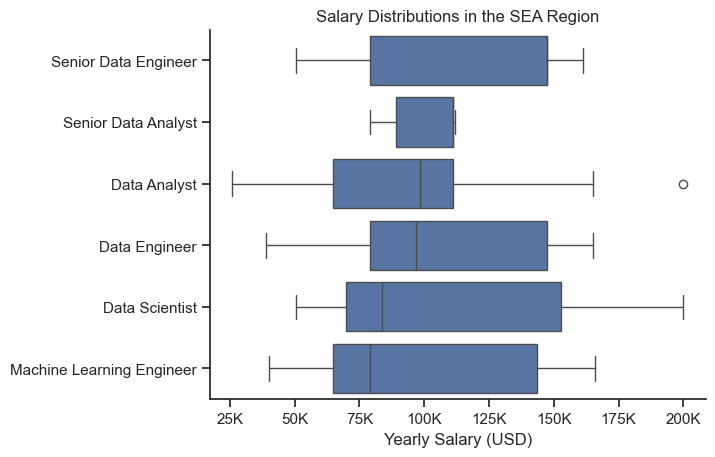

In [19]:
sns.boxplot(
    data= df_SEA_top6,
    x= "salary_year_avg",
    y= "job_title_short",
    order= job_order # seaborn also has a param to organize the order of categories
)
sns.set_theme(style= 'ticks')
sns.despine()

plt.title('Salary Distributions in the SEA Region')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)



### 2. Well-paid Skills for Data Analyst

In [7]:
# Fitler for DA jobs in SEA regions and drop NaN values in the 'salary' column
df_DA_SEA = df[
    (df['job_title_short'] == "Data Analyst") &
    (df['job_country'].isin(SEA_countries))
    ].copy()
df_DA_SEA = df_DA_SEA.dropna(subset =['salary_year_avg'])



In [8]:
# Explode the 'job_skills' column

df_DA_SEA_expl = df_DA_SEA.explode('job_skills')
df_DA_SEA_expl

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3457,Data Analyst,Session Lead (External Contractor) - Data Anal...,Singapore,via Ai-Jobs.net,Part-time,False,Singapore,2023-08-08 13:28:55,True,False,Singapore,year,100500.0,NaN,"Udacity, Inc.",python,"{'libraries': ['numpy', 'pandas'], 'programmin..."
3457,Data Analyst,Session Lead (External Contractor) - Data Anal...,Singapore,via Ai-Jobs.net,Part-time,False,Singapore,2023-08-08 13:28:55,True,False,Singapore,year,100500.0,NaN,"Udacity, Inc.",sql,"{'libraries': ['numpy', 'pandas'], 'programmin..."
3457,Data Analyst,Session Lead (External Contractor) - Data Anal...,Singapore,via Ai-Jobs.net,Part-time,False,Singapore,2023-08-08 13:28:55,True,False,Singapore,year,100500.0,NaN,"Udacity, Inc.",numpy,"{'libraries': ['numpy', 'pandas'], 'programmin..."
3457,Data Analyst,Session Lead (External Contractor) - Data Anal...,Singapore,via Ai-Jobs.net,Part-time,False,Singapore,2023-08-08 13:28:55,True,False,Singapore,year,100500.0,NaN,"Udacity, Inc.",pandas,"{'libraries': ['numpy', 'pandas'], 'programmin..."
3457,Data Analyst,Session Lead (External Contractor) - Data Anal...,Singapore,via Ai-Jobs.net,Part-time,False,Singapore,2023-08-08 13:28:55,True,False,Singapore,year,100500.0,NaN,"Udacity, Inc.",zoom,"{'libraries': ['numpy', 'pandas'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778277,Data Analyst,"Data Analyst, Mobile",Singapore,via Ai-Jobs.net,Full-time,False,Singapore,2023-08-25 05:39:34,False,False,Singapore,year,111175.0,NaN,2K,python,"{'analyst_tools': ['tableau'], 'programming': ..."
778277,Data Analyst,"Data Analyst, Mobile",Singapore,via Ai-Jobs.net,Full-time,False,Singapore,2023-08-25 05:39:34,False,False,Singapore,year,111175.0,NaN,2K,sql,"{'analyst_tools': ['tableau'], 'programming': ..."
778277,Data Analyst,"Data Analyst, Mobile",Singapore,via Ai-Jobs.net,Full-time,False,Singapore,2023-08-25 05:39:34,False,False,Singapore,year,111175.0,NaN,2K,tableau,"{'analyst_tools': ['tableau'], 'programming': ..."
778805,Data Analyst,Carbon Data Analyst,Singapore,via Ai-Jobs.net,Full-time,False,Singapore,2023-05-16 06:24:32,True,False,Singapore,year,98500.0,NaN,Terrascope,sql,"{'analyst_tools': ['excel'], 'programming': ['..."


In [9]:
# top 10 highest paid skills
df_DA_SEA_top_pay = df_DA_SEA_expl.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)
df_DA_SEA_top_pay

,count,median
job_skills,,
golang,1,165000.0
redshift,1,165000.0
kafka,2,165000.0
git,1,165000.0
scala,2,138087.5
spark,8,130414.0
javascript,2,115500.0
pandas,4,111175.0
sheets,1,111175.0


In [10]:
# top 10 most in-demand skills
df_DA_SEA_pop_skills = df_DA_SEA_expl.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
df_DA_SEA_pop_skills

,count,median
job_skills,,
spark,8,130414.0
looker,8,102750.0
tableau,36,100500.0
excel,34,100500.0
sql,62,99500.0
python,42,99500.0
r,24,98500.0
power bi,23,98500.0
word,8,89850.0


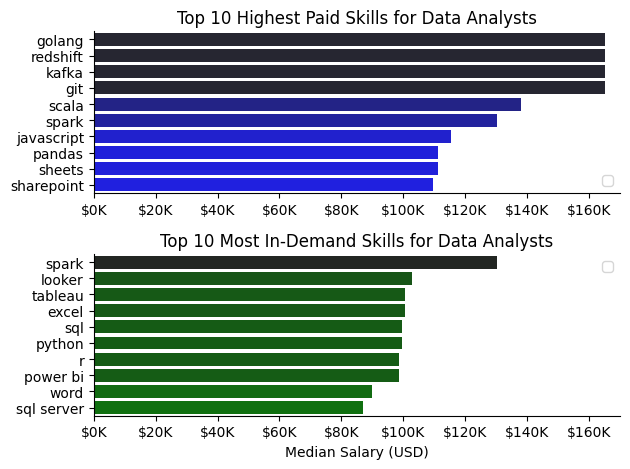

In [14]:
fig, ax = plt.subplots(2,1)

sns.barplot(
    data= df_DA_SEA_top_pay,
    x= 'median',
    y= 'job_skills',
    hue = 'median',
    palette= 'dark:b_r',
    ax= ax[0]
)

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend('')
ax[0].set_xlim(0,170000)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
sns.despine()
sns.barplot(
    data= df_DA_SEA_pop_skills,
    x= 'median',
    y= 'job_skills',
    hue = 'median',
    palette= 'dark:g_r',
    ax= ax[1]
)

ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].legend('')
ax[1].set_xlim(0,170000)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

fig.tight_layout()